<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw7_More_Singular_Value_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

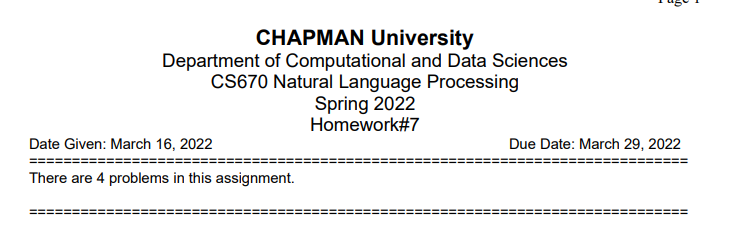

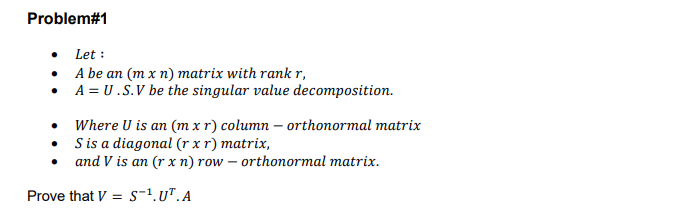

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.linalg import svd
from numpy.linalg import inv
np.set_printoptions(precision=2, suppress=True)

In [ ]:
A=np.zeros(shape=(4,6))
A[0] = [1,1,0,1,0,0]
A[1] = [1,0,1,1,0,0]
A[2] = [1,1,1,2,1,1]
A[3] = [0,0,0,1,1,1]

In [ ]:
A

array([[1., 1., 0., 1., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [1., 1., 1., 2., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [ ]:
U,S,V =np.linalg.svd(A)
print('U:\n',U)

U:
 [[-0.37 -0.47  0.71 -0.38]
 [-0.37 -0.47 -0.71 -0.38]
 [-0.78  0.12  0.    0.61]
 [-0.34  0.74  0.   -0.58]]


In [ ]:
S= np.diag(S)
S

array([[3.8 , 0.  , 0.  , 0.  ],
       [0.  , 1.55, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.38]])

In [ ]:
V=V[:4,:]
V

array([[-0.4 , -0.3 , -0.3 , -0.69, -0.3 , -0.3 ],
       [-0.53, -0.22, -0.22,  0.03,  0.56,  0.56],
       [ 0.  ,  0.71, -0.71, -0.  ,  0.  ,  0.  ],
       [-0.4 ,  0.6 ,  0.6 , -0.34,  0.06,  0.06]])

### Prove that: $$ V= S^{-1}.U^{T}.A  $$

In [ ]:
print(inv(S).dot(U.T).dot(A))

[[-0.4  -0.3  -0.3  -0.69 -0.3  -0.3 ]
 [-0.53 -0.22 -0.22  0.03  0.56  0.56]
 [-0.    0.71 -0.71  0.    0.    0.  ]
 [-0.4   0.6   0.6  -0.34  0.06  0.06]]


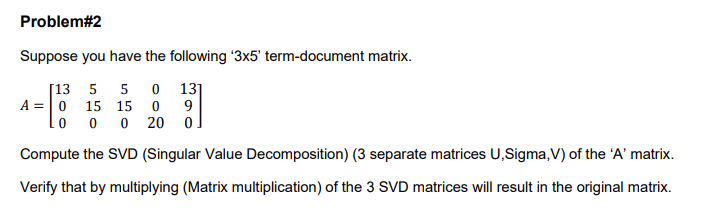

In [ ]:
A=np.zeros(shape=(3,5))
A[0] = [13,5,5,0,13]
A[1] = [0,15,15,0,9]
A[2] = [0,0,0,20,0]

In [ ]:
A

array([[13.,  5.,  5.,  0., 13.],
       [ 0., 15., 15.,  0.,  9.],
       [ 0.,  0.,  0., 20.,  0.]])

In [ ]:
U,S,V =np.linalg.svd(A)
print('U:\n',U)

U:
 [[-0.61  0.   -0.79]
 [-0.79  0.    0.61]
 [ 0.    1.    0.  ]]


In [ ]:
S= np.diag(S)
S

array([[27.13,  0.  ,  0.  ],
       [ 0.  , 20.  ,  0.  ],
       [ 0.  ,  0.  , 13.53]])

In [ ]:
V=V[:3,:]
V

array([[-0.29, -0.55, -0.55,  0.  , -0.55],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [-0.76,  0.38,  0.38,  0.  , -0.36]])

### Prove that: $$ A= U.S.V  $$

In [ ]:
print(U.dot(S).dot(V))

[[13.  5.  5.  0. 13.]
 [ 0. 15. 15.  0.  9.]
 [ 0.  0.  0. 20.  0.]]


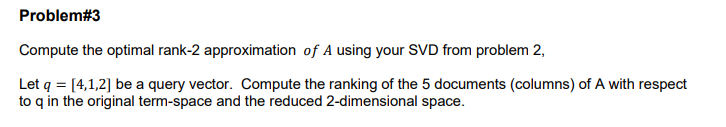

In [ ]:
k=2
Uk= U[:,:k]
Sk= S[:k,:k]
Vk= V[:k,:]

In [ ]:
Ak=Uk.dot(Sk).dot(Vk)

In [ ]:
Ak

array([[ 4.82,  9.1 ,  9.1 ,  0.  ,  9.17],
       [ 6.28, 11.85, 11.85,  0.  , 11.94],
       [ 0.  ,  0.  ,  0.  , 20.  ,  0.  ]])

In [ ]:
query=np.array([4,1,2]).reshape(1,3)

In [ ]:
doc_ranking =np.dot(query,Ak)

In [ ]:
doc_ranking 

array([[25.55, 48.25, 48.25, 40.  , 48.6 ]])

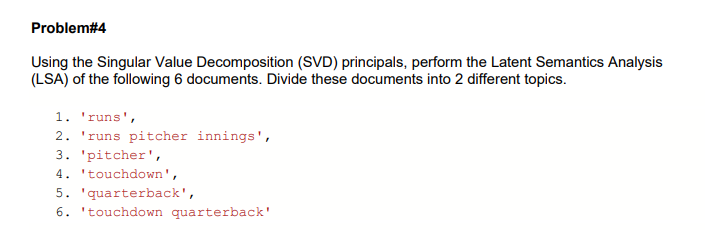

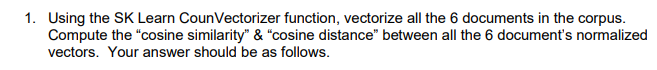

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
corpus = ['runs',
          'runs pitcher innings',
          'pitcher','touchdown',
          'quarterback',
          'touchdown quarterback'
          ]

In [ ]:
corpus

['runs',
 'runs pitcher innings',
 'pitcher',
 'touchdown',
 'quarterback',
 'touchdown quarterback']

In [ ]:
vectorizer = CountVectorizer()
bag_of_words= vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['innings', 'pitcher', 'quarterback', 'runs', 'touchdown'],
      dtype=object)

In [ ]:
print(bag_of_words.toarray())

[[0 0 0 1 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 1]]


In [ ]:
# Create Vectors
A= bag_of_words.toarray()[0]
B= bag_of_words.toarray()[1]
C= bag_of_words.toarray()[2]
D= bag_of_words.toarray()[3]
E= bag_of_words.toarray()[4]
F= bag_of_words.toarray()[5]
vectors = [A,B,C,D,E,F]

In [ ]:
def normalized(v0):
  return v0/np.linalg.norm(v0)

In [ ]:
# Normalized vectors
A_norm= normalized(A)
B_norm= normalized(B)
C_norm= normalized(C)
D_norm= normalized(D)
E_norm= normalized(E)
F_norm= normalized(F)
vectors_norm = [A_norm,B_norm,C_norm,D_norm,E_norm,F_norm]

In [ ]:
def cosine_similarity(pt1,pt2):
  return np.dot(pt1,pt2)

In [ ]:
len(corpus)

6

In [ ]:
np.set_printoptions(precision=4, suppress=True)
numDoc = len(corpus)
cosine_Smatrix = np.zeros((numDoc,numDoc))
cosine_Dmatrix = np.zeros((numDoc,numDoc))

for i in range(numDoc):
  for j in range(numDoc):
    cosine_Smatrix[i,j]= cosine_similarity(vectors_norm[i],vectors_norm[j])
    cosine_Dmatrix[i,j]= 1-cosine_Smatrix[i,j]
print('Cosine Similarity\n:',cosine_Smatrix)
print('Cosine Distance\n:',cosine_Dmatrix)

Cosine Similarity
: [[1.     0.5774 0.     0.     0.     0.    ]
 [0.5774 1.     0.5774 0.     0.     0.    ]
 [0.     0.5774 1.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.7071]
 [0.     0.     0.     0.     1.     0.7071]
 [0.     0.     0.     0.7071 0.7071 1.    ]]
Cosine Distance
: [[ 0.      0.4226  1.      1.      1.      1.    ]
 [ 0.4226 -0.      0.4226  1.      1.      1.    ]
 [ 1.      0.4226  0.      1.      1.      1.    ]
 [ 1.      1.      1.      0.      1.      0.2929]
 [ 1.      1.      1.      1.      0.      0.2929]
 [ 1.      1.      1.      0.2929  0.2929  0.    ]]


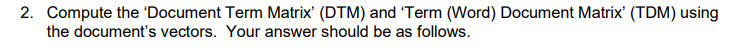

In [ ]:
TDM =bag_of_words.todense().T
print('Term Document Matrix\n:',TDM)

Term Document Matrix
: [[0 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 0 1 1]
 [1 1 0 0 0 0]
 [0 0 0 1 0 1]]


In [ ]:
DTM =bag_of_words.todense()
print('Document Term Matrix\n:',DTM)

Document Term Matrix
: [[0 0 0 1 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 1]]


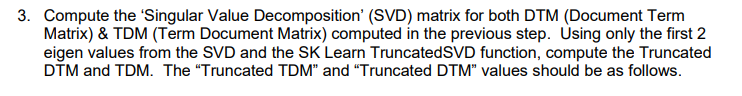

### Truncated DTM and TDM 

In [ ]:
np.set_printoptions(precision=8, suppress=True)
V, Sigma, Ustar =svd(DTM)
print('SVD for DTM - V:\n',V, '\n Sigma: \n',Sigma, '\n U:\n',Ustar)

SVD for DTM - V:
 [[-0.32505758  0.          0.         -0.70710678  0.62796303  0.        ]
 [-0.88807383  0.          0.          0.         -0.45970084  0.        ]
 [-0.32505758  0.          0.          0.70710678  0.62796303  0.        ]
 [ 0.          0.40824829 -0.70710678  0.          0.         -0.57735027]
 [ 0.          0.40824829  0.70710678  0.          0.         -0.57735027]
 [ 0.          0.81649658 -0.          0.          0.          0.57735027]] 
 Sigma: 
 [1.93185165 1.73205081 1.         1.         0.51763809] 
 U:
 [[-0.45970084 -0.62796303  0.         -0.62796303 -0.        ]
 [-0.         -0.          0.70710678  0.          0.70710678]
 [-0.         -0.          0.70710678  0.         -0.70710678]
 [ 0.          0.70710678  0.         -0.70710678  0.        ]
 [-0.88807383  0.32505758 -0.          0.32505758 -0.        ]]


In [ ]:
np.set_printoptions(precision=4, suppress=True)
V, Sigma, Ustar =svd(TDM)
print('SVD for TDM- V:\n',V, '\n Sigma: \n',Sigma, '\n U:\n',Ustar)

SVD for TDM- V:
 [[-0.4597 -0.     -0.     -0.     -0.8881]
 [-0.628   0.      0.      0.7071  0.3251]
 [ 0.     -0.7071 -0.7071  0.      0.    ]
 [-0.628   0.      0.     -0.7071  0.3251]
 [ 0.     -0.7071  0.7071  0.      0.    ]] 
 Sigma: 
 [1.9319 1.7321 1.     1.     0.5176] 
 U:
 [[-0.3251 -0.8881 -0.3251  0.      0.      0.    ]
 [-0.     -0.      0.     -0.4082 -0.4082 -0.8165]
 [-0.     -0.      0.      0.7071 -0.7071  0.    ]
 [-0.7071  0.      0.7071  0.      0.      0.    ]
 [ 0.628  -0.4597  0.628   0.      0.      0.    ]
 [ 0.      0.      0.     -0.5774 -0.5774  0.5774]]


In [ ]:
# Truncated TDM
V, Sigma, Ustar =svd(TDM)
sigma_significant_num=2
Truncated_UMatrix =V[:,:sigma_significant_num] 
Truncated_SigmaMatrix =Sigma[:sigma_significant_num] 
Truncated_SigmaMatrix_full = np.diag(Truncated_SigmaMatrix)
reduced_matrix_tdm=np.dot(Truncated_UMatrix,Truncated_SigmaMatrix_full)
print(reduced_matrix_tdm)


[[-0.8881  0.    ]
 [-1.2131  0.    ]
 [ 0.     -1.2247]
 [-1.2131  0.    ]
 [ 0.     -1.2247]]


In [ ]:
# Truncated DTM
V, Sigma, Ustar =svd(DTM)
sigma_significant_num=2
Truncated_UMatrix =V[:,:sigma_significant_num] 
Truncated_SigmaMatrix =Sigma[:sigma_significant_num] 
Truncated_SigmaMatrix_full = np.diag(Truncated_SigmaMatrix)
reduced_matrix_tdm=np.dot(Truncated_UMatrix,Truncated_SigmaMatrix_full)
print(reduced_matrix_tdm)

[[-0.628   0.    ]
 [-1.7156  0.    ]
 [-0.628   0.    ]
 [ 0.      0.7071]
 [ 0.      0.7071]
 [ 0.      1.4142]]


### SK Learn Truncated TDM/DTM

In [ ]:
svd=TruncatedSVD(n_components=sigma_significant_num)
lsa=svd.fit_transform(bag_of_words.todense().T)

In [ ]:
print('TDM: \n',lsa)

TDM: 
 [[ 0.8881  0.    ]
 [ 1.2131 -0.    ]
 [ 0.      1.2247]
 [ 1.2131 -0.    ]
 [ 0.      1.2247]]


In [ ]:
svd=TruncatedSVD(n_components=sigma_significant_num)
lsa=svd.fit_transform(bag_of_words.todense())

In [ ]:
print('DTM: \n',lsa)

DTM: 
 [[ 0.628   0.    ]
 [ 1.7156  0.    ]
 [ 0.628   0.    ]
 [-0.      0.7071]
 [-0.      0.7071]
 [-0.      1.4142]]


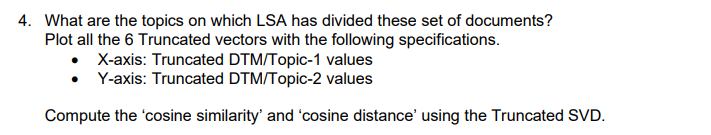

In [ ]:
import pandas as pd
topic_encoded_df=pd.DataFrame(lsa, columns=["Topic1","Topic2"])
topic_encoded_df['Corpus']=corpus
print(topic_encoded_df.round(4) )

   Topic1  Topic2                 Corpus
0  0.6280  0.0000                   runs
1  1.7156  0.0000   runs pitcher innings
2  0.6280  0.0000                pitcher
3 -0.0000  0.7071              touchdown
4 -0.0000  0.7071            quarterback
5 -0.0000  1.4142  touchdown quarterback


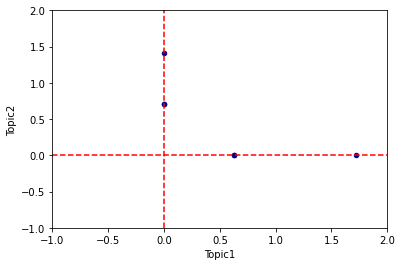

In [ ]:
ax1 = topic_encoded_df.plot.scatter(x='Topic1', y='Topic2', c='DarkBlue')
ax1.set_xlim(-1,2)
ax1.set_ylim(-1,2)
ax1.axhline(0, color="red", linestyle="--")
ax1.axvline(0, color="red", linestyle="--")

5. Which documents are more appropriate for ‘Topic-1’ and ‘Topic-2’?

Topic 1: Documents -1,2,3
Topic 2: Documents  4,5,6

6. Which are the top 2 words that describe ‘Topic-1’ and ‘Topic-2’?

Runs, pitcher, innings for Topic 1 . touchdown, quarterback for Topic 2